# Introduction



# Table of Contents

In [1]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook" 


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('RdBu')

'''Miscellaneous'''
from feature_engine import outlier_removers


'''Seeds'''
import random
random.seed(10)
np.random.seed(11)


In [2]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

## A very first glance

In [3]:
df = pd.read_csv('results.csv').sort_index(axis=1)

In [4]:
print('Observations                 : ', df.shape[0])
print('Features                     : ', df.shape[1])

Observations                 :  31984
Features                     :  21


In [5]:
df.sample(8)

,10k,20k,25k,30k,35k,40k,5k,age,bib,city,country,ctz,division,gender,genderdiv,half,name,official,overall,pace,state
17308,47.70,94.05,120.22,148.05,177.07,207.73,24.13,60,19790,Riverview,CAN,NaN,147,M,8943,99.25,"Forbes, Robert A.",221.52,12875,8.45,NB
13037,47.90,96.35,121.13,147.07,173.83,200.85,23.97,61,14920,Lac St-Joseph,CAN,NaN,3,F,2567,101.67,"Grenon, Helene",213.20,10285,8.13,QC
12810,48.55,96.62,120.80,146.13,171.87,199.47,24.70,36,14662,Caracas,VEN,NaN,1714,F,2293,101.90,"Fuentes H, Carolina",211.40,9742,8.07,NaN
30974,56.13,109.97,137.00,165.03,194.37,224.02,28.22,43,34821,Erpeldange,LUX,NaN,1811,M,10816,116.00,"Osch, Eric",237.10,17295,9.05,NaN
29590,62.13,125.93,158.23,197.42,235.15,273.17,30.52,53,33230,Ponte Vedra Beach,USA,NaN,2134,M,14807,132.92,"Hawes, Tim",290.07,26136,11.07,FL
13537,46.63,93.97,117.98,143.13,169.28,195.58,23.05,63,15480,Mill Creek,USA,NaN,52,M,6698,99.18,"Beyerlein, Douglas",207.05,8388,7.90,WA
24456,59.25,124.72,158.00,195.37,235.78,277.30,29.12,33,27711,Watertown,USA,NaN,5550,F,11484,131.28,"McCourt, Caitlin E.",292.93,26453,11.18,MA
30140,55.32,110.17,138.63,170.33,204.93,238.92,28.27,30,33843,Dorchester,USA,NaN,4381,F,8495,116.23,"Hobin, Michelle C.",254.25,20841,9.70,MA


# Rearrange Columns for Better Neat

In [6]:
cols = ['name',
        '5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official', 'pace', 
        'overall', 'genderdiv', 'division', # competitors rank in divisions
        'age', 'gender',  # competitors charactersitics
        'ctz', 'country', 'state', 'city', 'bib']

df = df[cols]

# Rename Columns for Better Understandable

In [7]:
df.rename({'division' : 'rank_in_division', 
           'genderdiv': 'rank_in_gender_only',
           'overall'  : 'rank_overall'},
          axis=1, inplace=True)

In [8]:
df.head()

,name,5k,10k,20k,half,25k,30k,35k,40k,official,pace,rank_overall,rank_in_gender_only,rank_in_division,age,gender,ctz,country,state,city,bib
0,"Yamamoto, Hiroyuki",8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,3.27,8,8,8,47,M,NaN,JPN,NaN,Fukuoka,W1
1,"Jeptoo, Rita",16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,5.30,21,1,1,33,F,NaN,KEN,NaN,Eldoret,F1
2,"Van Dyk, Ernst F.",7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,3.08,1,1,1,41,M,NaN,RSA,NaN,Paarl,W2
3,"Dibaba, Mare",16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,5.37,27,3,3,24,F,NaN,ETH,NaN,Shoa,F2
4,"Hokinoue, Kota",8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,3.10,2,2,2,40,M,NaN,JPN,NaN,Nogata Fukuoka,W3


# Data Type Correction

### To Float64 with Numericals

In [9]:
df.dtypes

name                    object
5k                      object
10k                     object
20k                     object
half                    object
25k                     object
30k                     object
35k                     object
40k                     object
official               float64
pace                   float64
rank_overall             int64
rank_in_gender_only      int64
rank_in_division         int64
age                      int64
gender                  object
ctz                     object
country                 object
state                   object
city                    object
bib                     object
dtype: object

***Alert***
I found some rows are strings of '-', which error my astype(). There kind of rows would be marked as np.nan then impute latter.

In [10]:
# Replace "-" = NaN
df = df.replace('-', np.nan)

df.isna().sum().sort_values(ascending=False).head(13)

ctz      30740
state     2576
25k        216
half        72
5k          52
20k         51
10k         50
30k         40
40k         39
35k         34
city         1
bib          0
pace         0
dtype: int64

In [11]:
# To float64
to_float64 = ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k']
df[to_float64] = df[to_float64].astype('float64')

# Double check
df.dtypes

name                    object
5k                     float64
10k                    float64
20k                    float64
half                   float64
25k                    float64
30k                    float64
35k                    float64
40k                    float64
official               float64
pace                   float64
rank_overall             int64
rank_in_gender_only      int64
rank_in_division         int64
age                      int64
gender                  object
ctz                     object
country                 object
state                   object
city                    object
bib                     object
dtype: object

### To Category

In [12]:
# To category
to_cate = ['rank_overall', 'rank_in_gender_only', 'rank_in_division']
df[to_cate] = df[to_cate].astype('category')

# Double check
df.dtypes

name                     object
5k                      float64
10k                     float64
20k                     float64
half                    float64
25k                     float64
30k                     float64
35k                     float64
40k                     float64
official                float64
pace                    float64
rank_overall           category
rank_in_gender_only    category
rank_in_division       category
age                       int64
gender                   object
ctz                      object
country                  object
state                    object
city                     object
bib                      object
dtype: object

# Missing Data

       Numbers   Percent
ctz      30740  0.961106
state     2576  0.080540
25k        216  0.006753
half        72  0.002251
5k          52  0.001626
20k         51  0.001595
10k         50  0.001563
30k         40  0.001251
40k         39  0.001219
35k         34  0.001063
city         1  0.000031
bib          0  0.000000


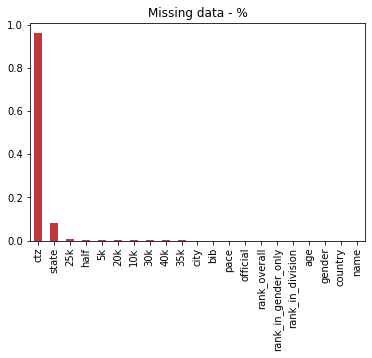

In [13]:
# A Brief of Missing data

total_miss   = df.isnull().sum().sort_values(ascending=False)
percent      = total_miss / df.shape[0]

table = pd.concat([total_miss, percent], axis=1, keys=['Numbers', 'Percent'])

print(table.head(12))
table.Percent.plot(kind='bar', title='Missing data - %')

Missing points

* ***ctz***: there is 96 percents of data are NaN, we are droping it. 
* ***state***: only 8% is missing, where competitors come from countries but USA.
* ***The rest***: just a small minor of rows, drop them.

### List-wise remove

In [14]:
df.drop('ctz', axis=1, inplace=True)

df.dropna(subset=['25k', 'half', '5k', '20k', '10k', '30k', '40k', '35k', 'city'], axis=0, inplace=True)

### Convert: NaN of 'state' to Others

Assumption.

Competitors from countries but USA had ***state*** values are NaN. Let's check it out.

In [15]:
state_is_na = df['state'].isna()

df[['city', 'country', 'state']][state_is_na].sample(8)

,city,country,state
20881,Mexico City,MEX,NaN
11329,Santiago,CHI,NaN
13392,Tokyo,JPN,NaN
2178,Ludvika,SWE,NaN
2269,Yilan County,TPE,NaN
31391,Chiusi (siena),ITA,NaN
18063,Hong Kong,HKG,NaN
8761,Singapore,SIN,NaN


Yes, it's true.

Therefor, we will create a new value for them: ***others***.

In [16]:
df['state'][state_is_na] = 'others'

### Whether Zero is Missing

In [17]:
# This case: zero values mean missing data. Check for it.
print('Data points with Zero values: ', (df==0).sum().sum())

Data points with Zero values:  0


Luckily, it's safe.

In [18]:
print('Missing data left: ', df.isna().sum().sum())

Missing data left:  0


# Anomaly Detection

In [19]:
# Negative values are Anomaly
df.select_dtypes(exclude='O').min()

5k                      7.75
10k                    16.62
20k                    36.10
half                   38.03
25k                    45.80
30k                    56.45
35k                    67.42
40k                    76.10
official               80.60
pace                    3.08
rank_overall            1.00
rank_in_gender_only     1.00
rank_in_division        1.00
age                    18.00
dtype: float64

# Outliers with the IQR Proximity Rule

According to this https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py, outliers have negative impact to scalings later, so we need to clean out of them.

***IQR limits***
* Right tail: 75th quantile + 3* IQR

* Left tail: 25th quantile - 3* IQR

Where IQR is the inter-quartile range: 75th quantile - 25th quantile.

In [21]:
df.dtypes

name                     object
5k                      float64
10k                     float64
20k                     float64
half                    float64
25k                     float64
30k                     float64
35k                     float64
40k                     float64
official                float64
pace                    float64
rank_overall           category
rank_in_gender_only    category
rank_in_division       category
age                       int64
gender                   object
country                  object
state                    object
city                     object
bib                      object
dtype: object

In [23]:
numerics = ['int64', 'float64']
to_outliers = list(df.select_dtypes(include=numerics).columns.values)

outliers_trimmer = outlier_removers.OutlierTrimmer(distribution='skewed', tail='both', fold=3, variables=to_outliers)
outliers_trimmer.fit(df)

df = outliers_trimmer.transform(df)

In [24]:
df.describe(percentiles=[0.01, 0.25, 0.75, 0.9999])

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,age
count,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000,31634.000000
mean,25.669532,51.613942,105.290512,111.178781,133.538698,163.838788,195.967822,228.116993,241.876447,9.233566,42.379339
std,4.186585,8.677743,19.098049,20.241443,25.483550,32.769477,40.641083,47.933124,50.697346,1.933606,11.296433
min,7.750000,16.620000,36.100000,38.030000,45.800000,56.450000,67.420000,76.100000,80.600000,3.080000,18.000000
1%,17.870000,35.800000,72.409900,76.420000,90.950000,109.946500,129.700000,149.536600,158.323300,6.050000,21.000000
25%,22.620000,45.350000,91.670000,96.750000,115.430000,140.500000,166.935000,193.605000,205.280000,7.830000,33.000000
50%,25.050000,50.280000,101.980000,107.680000,128.830000,157.480000,187.830000,218.450000,231.925000,8.850000,42.000000
75%,28.380000,56.980000,116.127500,122.650000,147.670000,182.150000,219.320000,256.480000,272.150000,10.380000,50.000000
99.99%,43.184276,88.012037,185.535050,195.971010,239.442205,297.180791,359.244225,412.286009,436.658535,16.745505,81.000000
max,45.680000,91.080000,189.020000,198.450000,243.030000,300.730000,365.620000,433.280000,461.870000,17.620000,81.000000


In [25]:
df.to_csv('data_clean_noOutliers.csv', index=False)